<a href="https://colab.research.google.com/github/Jasmeet0810/Rainfall-Prediction/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/rainfall_in_india_1901-2015.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [ ]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4112.000000,4113.000000,4110.000000,4112.000000,4113.000000,4111.000000,4109.000000,4112.000000,4110.000000,4109.000000,4105.000000,4106.000000,4090.000000,4110.000000,4107.000000,4106.000000,4103.000000
mean,1958.218659,18.957320,21.805325,27.359197,43.127432,85.745417,230.234444,347.214334,290.263497,197.361922,95.507009,39.866163,18.870580,1411.008900,40.747786,155.901753,1064.724769,154.100487
std,33.140898,33.585371,35.909488,46.959424,67.831168,123.234904,234.710758,269.539667,188.770477,135.408345,99.519134,68.685410,42.369611,903.846565,59.308277,201.316965,707.741531,166.942660
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.350000,175.600000,155.975000,100.525000,14.600000,0.700000,0.100000,804.500000,4.100000,24.050000,573.850000,34.200000
50%,1958.000000,6.000000,6.700000,7.800000,15.700000,36.600000,138.700000,284.800000,259.400000,173.900000,65.200000,9.500000,3.000000,1121.300000,19.200000,74.800000,881.100000,98.200000
75%,1987.000000,22.200000,26.800000,31.300000,49.950000,97.200000,305.150000,418.400000,377.800000,265.800000,148.400000,46.100000,17.500000,1644.775000,50.375000,196.950000,1288.175000,213.500000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [ ]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


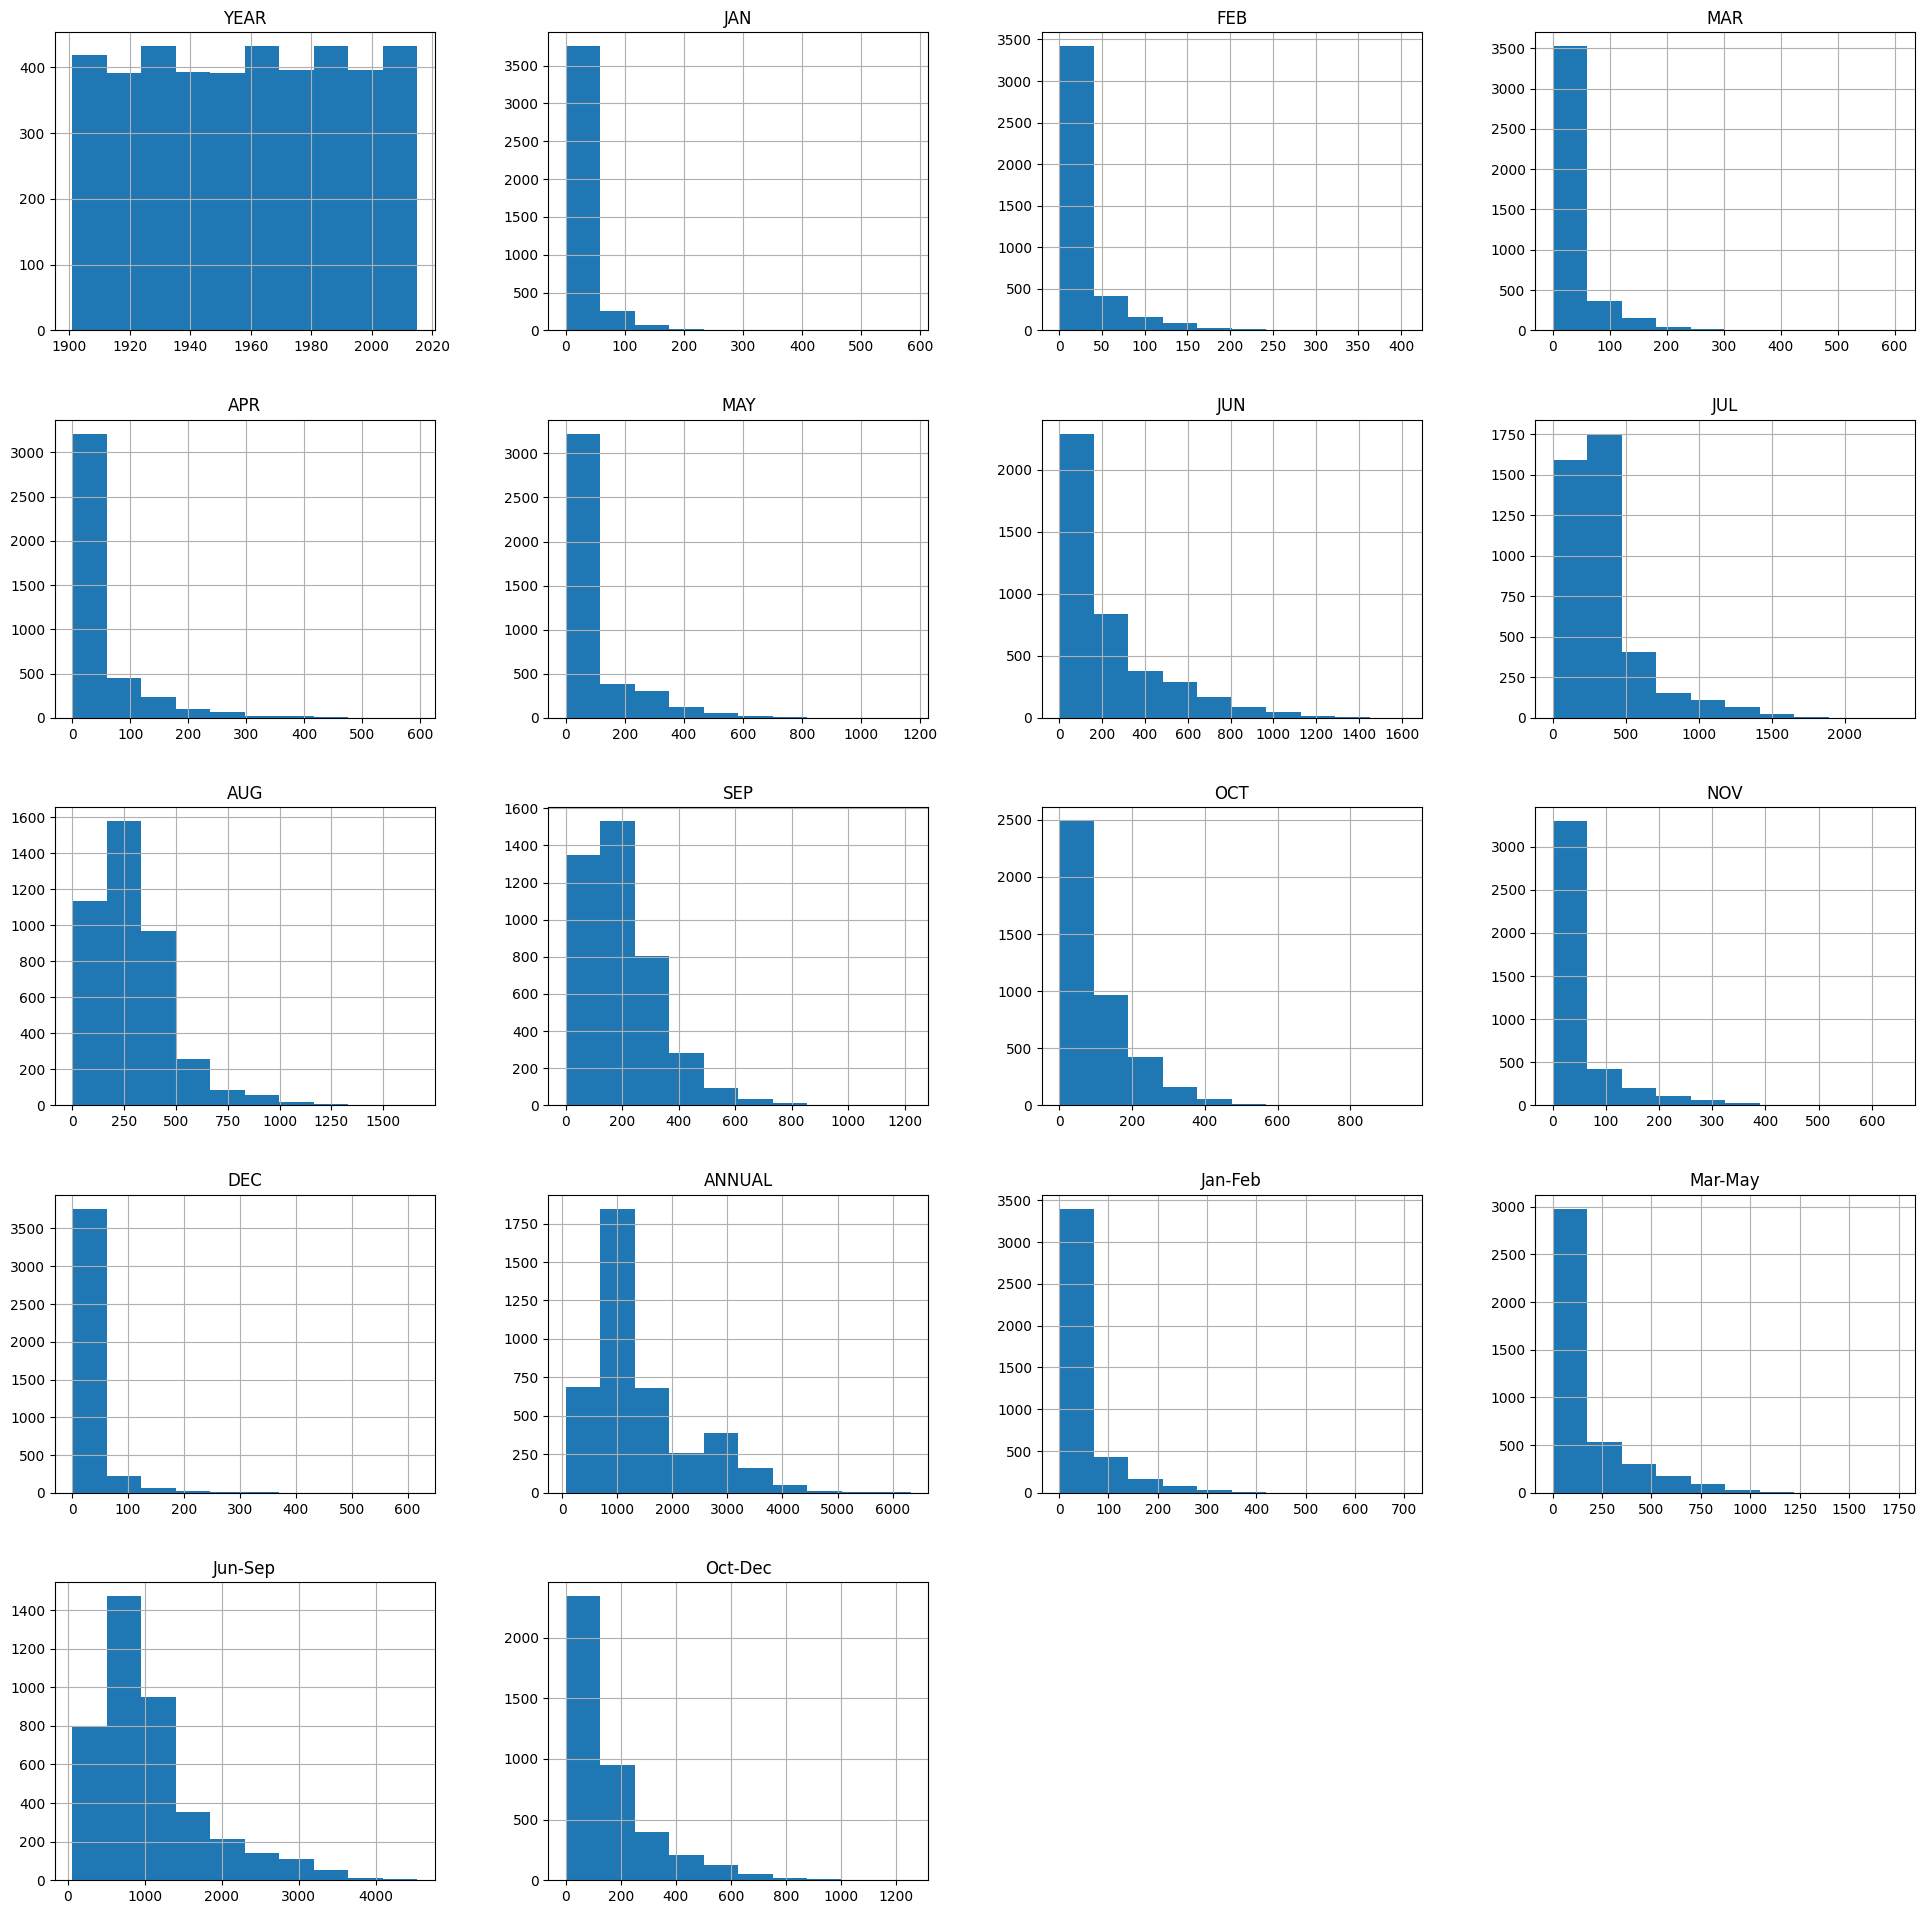

In [ ]:
df.hist(figsize=(24,24));

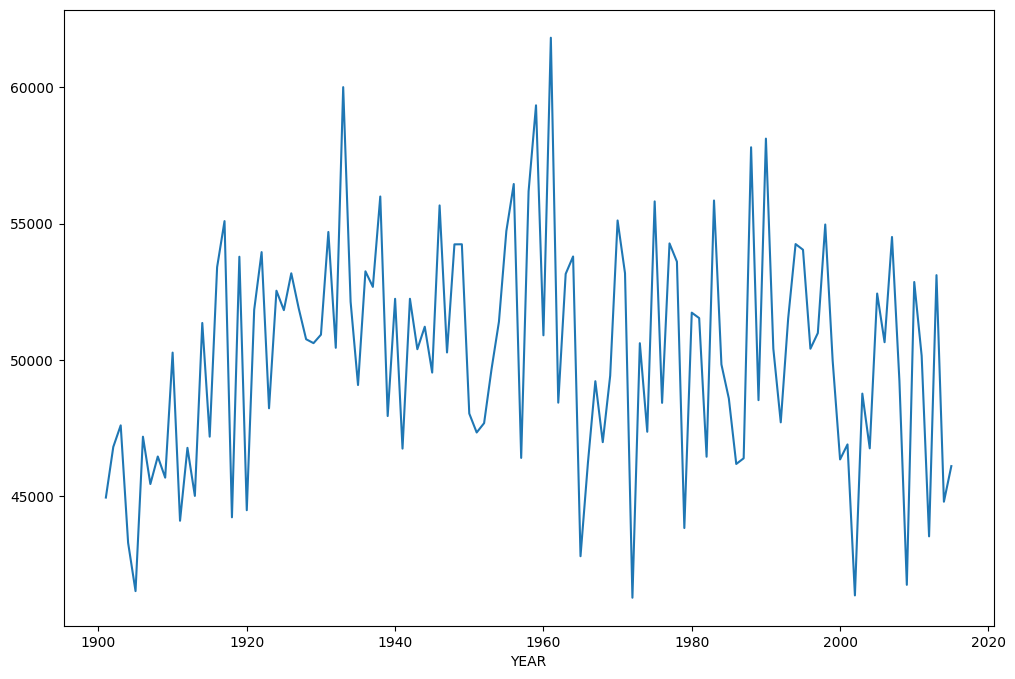

In [ ]:
df.groupby("YEAR").sum()['ANNUAL'].plot(figsize=(12,8));

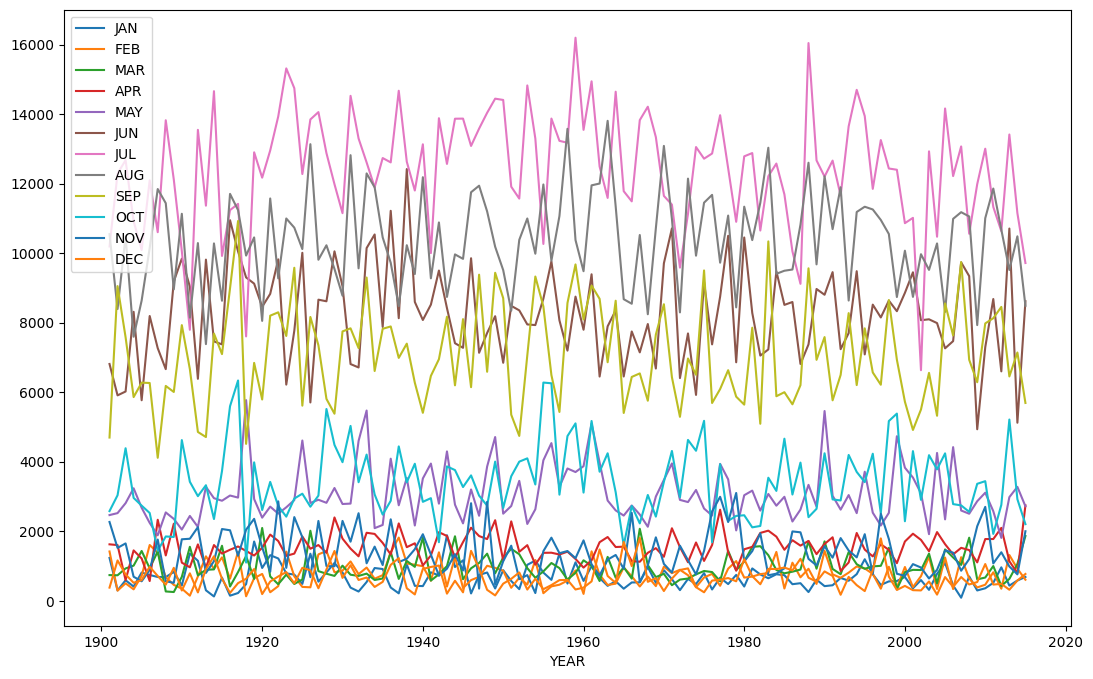

In [ ]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(figsize=(13,8));

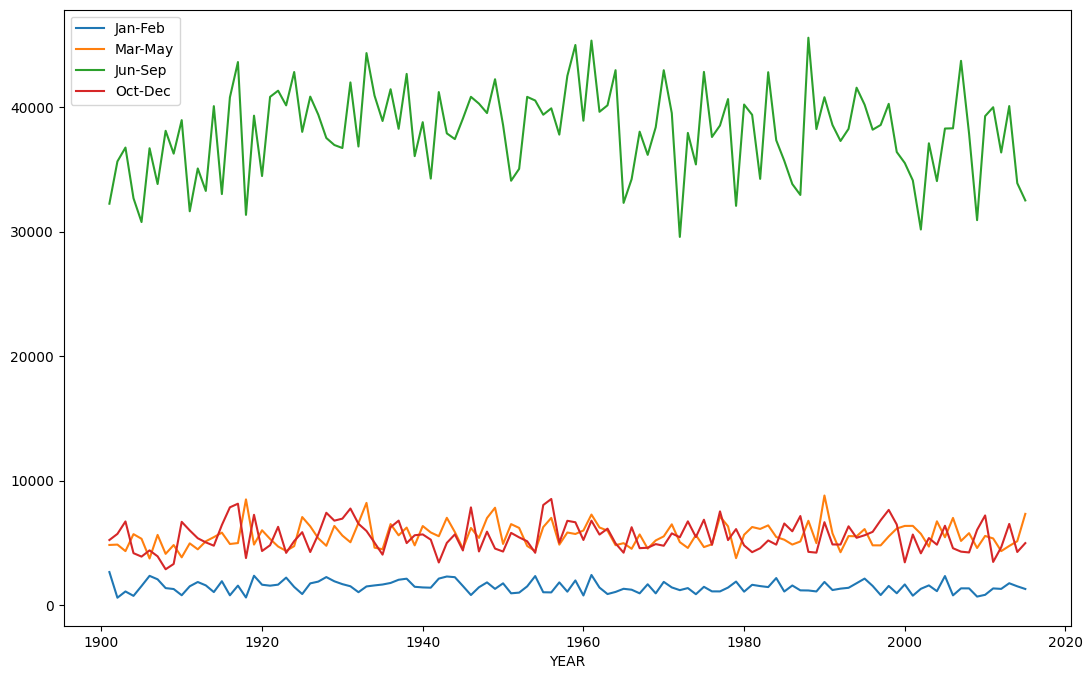

In [ ]:
df[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(13,8));

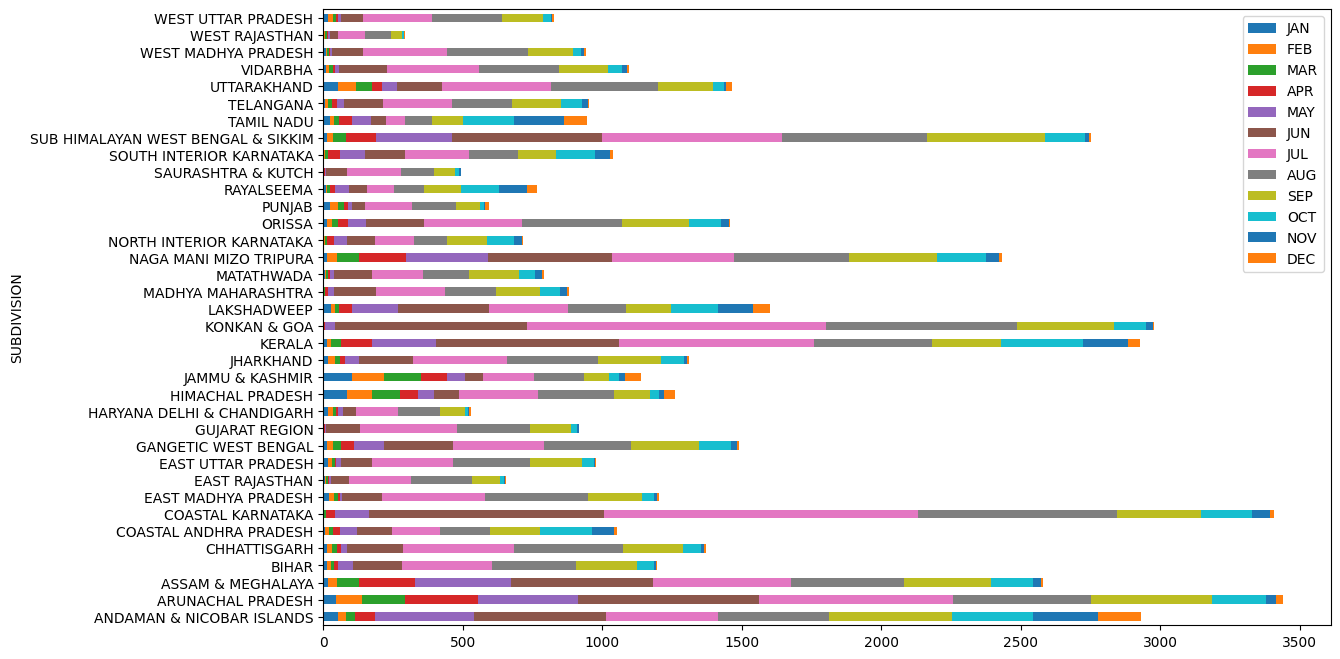

In [ ]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.barh(stacked=True,figsize=(13,8));

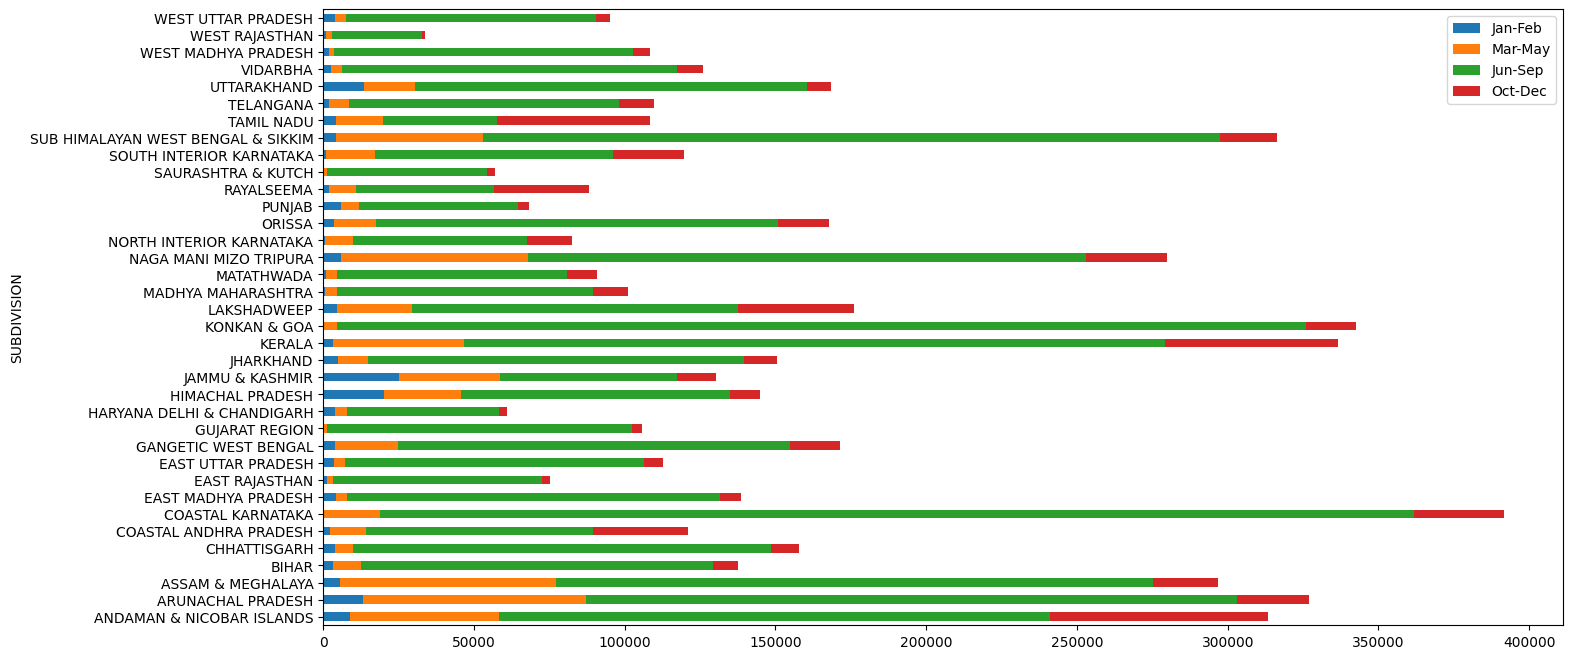

In [ ]:
df[['SUBDIVISION', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("SUBDIVISION").sum().plot.barh(stacked=True,figsize=(16,8));

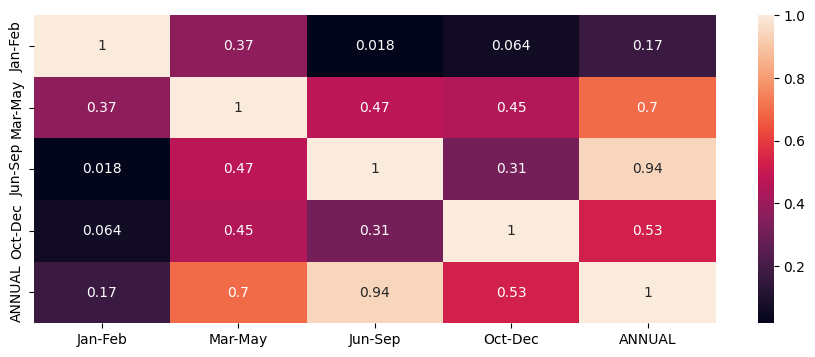

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(df[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

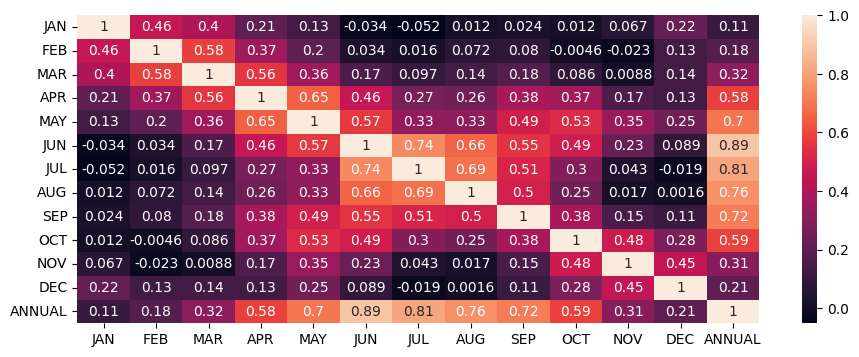

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(df[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [ ]:
#Function to plot the graphs
def plot_graphs(groundtruth,prediction,title):
    N = 9
    ind = np.arange(N)  # the x locations for the groups
    width = 0.27       # the width of the bars

    fig = plt.figure()
    fig.suptitle(title, fontsize=12)
    ax = fig.add_subplot(111)
    rects1 = ax.bar(ind, groundtruth, width, color='r')
    rects2 = ax.bar(ind+width, prediction, width, color='g')

    ax.set_ylabel("Amount of rainfall")
    ax.set_xticks(ind+width)
    ax.set_xticklabels( ('APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC') )
    ax.legend( (rects1[0], rects2[0]), ('Ground truth', 'Prediction') )

#     autolabel(rects1)
    for rect in rects1:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
    for rect in rects2:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')
#     autolabel(rects2)

    plt.show()

In [ ]:
# seperation of training and testing data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_df = np.asarray(df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_df.shape[1]-3):
    if X is None:
        X = division_df[:, i:i+3]
        y = division_df[:, i+3]
    else:
        X = np.concatenate((X, division_df[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_df[:, i+3]), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
#test 2010
temp = df[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[df['YEAR'] == 2010]

df_2010 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2010 = None; y_year_2010 = None
for i in range(df_2010.shape[1]-3):
    if X_year_2010 is None:
        X_year_2010 = df_2010[:, i:i+3]
        y_year_2010 = df_2010[:, i+3]
    else:
        X_year_2010 = np.concatenate((X_year_2010, df_2010[:, i:i+3]), axis=0)
        y_year_2010 = np.concatenate((y_year_2010, df_2010[:, i+3]), axis=0)

In [ ]:
#test 2005
temp = df[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[df['YEAR'] == 2005]

df_2005 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2005 = None; y_year_2005 = None
for i in range(df_2005.shape[1]-3):
    if X_year_2005 is None:
        X_year_2005 = df_2005[:, i:i+3]
        y_year_2005 = df_2005[:, i+3]
    else:
        X_year_2005 = np.concatenate((X_year_2005, df_2005[:, i:i+3]), axis=0)
        y_year_2005 = np.concatenate((y_year_2005, df_2005[:, i+3]), axis=0)


#terst 2015
temp = df[['SUBDIVISION','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[df['YEAR'] == 2015]

df_2015 = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['SUBDIVISION'] == 'TELANGANA'])

X_year_2015 = None; y_year_2015 = None
for i in range(df_2015.shape[1]-3):
    if X_year_2015 is None:
        X_year_2015 = df_2015[:, i:i+3]
        y_year_2015 = df_2015[:, i+3]
    else:
        X_year_2015 = np.concatenate((X_year_2015, df_2015[:, i:i+3]), axis=0)
        y_year_2015 = np.concatenate((y_year_2015, df_2015[:, i+3]), axis=0)

In [ ]:
imputer = SimpleImputer(strategy="mean")
y_train_imputed = imputer.fit_transform(y_train.reshape(-1, 1))

In [ ]:
if not np.issubdtype(y_train.dtype, np.number):
    y_train = y_train.astype(np.float64)

In [ ]:
reg.fit(X_train_imputed, y_train_imputed)

ElasticNet(alpha=0.5)

In [ ]:
import numpy as np

# Check for NaN values in y_test
nan_count = np.count_nonzero(np.isnan(y_test))

if nan_count > 0:
    print("There are {} NaN values in y_test.".format(nan_count))
    # Handle NaN values (e.g., remove rows with NaN values)
else:
    print("There are no NaN values in y_test.")


There are 7 NaN values in y_test.


In [ ]:
# Remove rows with NaN values from y_test
y_test_filtered = y_test[~np.isnan(y_test)]

In [ ]:
y_pred_filtered = y_pred[~np.isnan(y_pred)]

In [ ]:
print("Mean absolute error:", mae)

Mean absolute error: 147.78051122765444


MEAN 2005
121.2111111111111 126.1751139168646
Standard deviation 2005
123.77066107608005 89.10264430450832
MEAN 2010
139.93333333333334 133.3583872963097
Standard deviation 2010
135.71320250194282 103.8932397130743
MEAN 2015
88.52222222222223 115.2771720644692
Standard deviation 2015
86.62446123324875 77.51849820774842


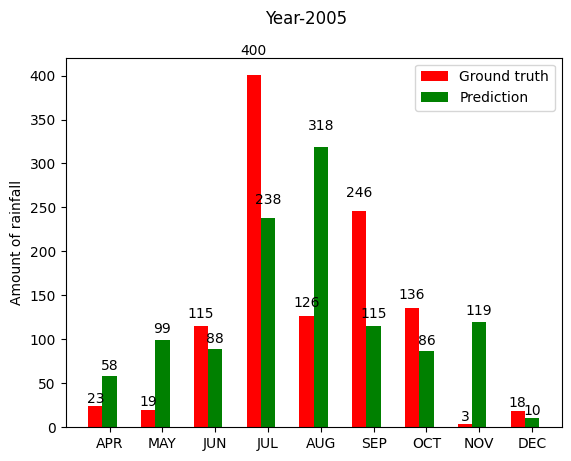

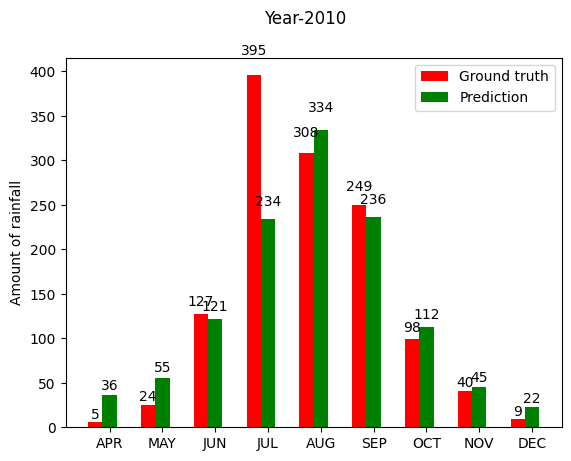

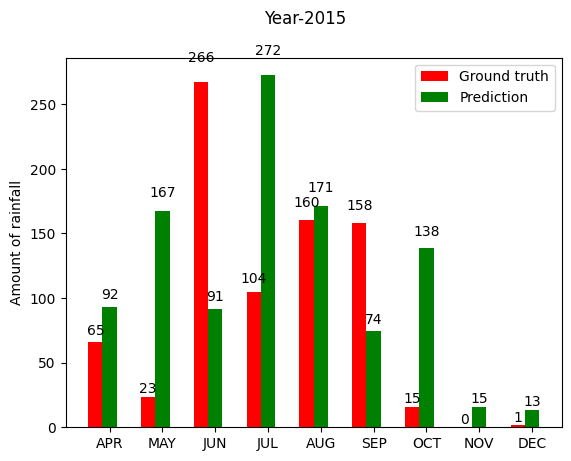

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)


#2010
y_year_pred_2010 = reg.predict(X_year_2010)

y_year_pred_2015 = reg.predict(X_year_2015)

print("MEAN 2005")
print(np.mean(y_year_2005), np.mean(y_year_pred_2005))
print("Standard deviation 2005")
print(np.sqrt(np.var(y_year_2005)), np.sqrt(np.var(y_year_pred_2005)))
print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))


plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

127.10213981219651


MEAN 2005
121.2111111111111 126.1751139168646
Standard deviation 2005
123.77066107608005 89.10264430450832
MEAN 2010
139.93333333333334 133.3583872963097
Standard deviation 2010
135.71320250194282 103.8932397130743
MEAN 2015
88.52222222222223 115.2771720644692
Standard deviation 2015
86.62446123324875 77.51849820774842


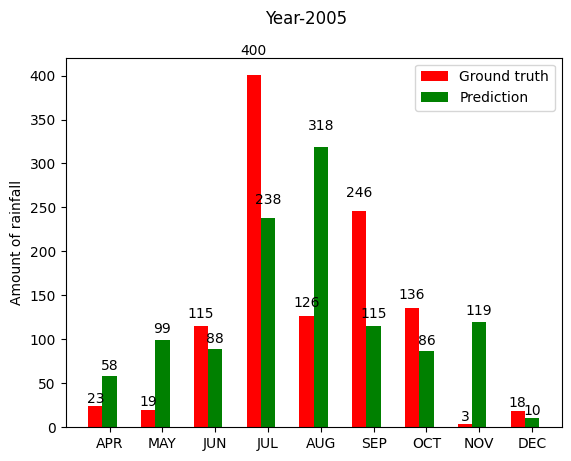

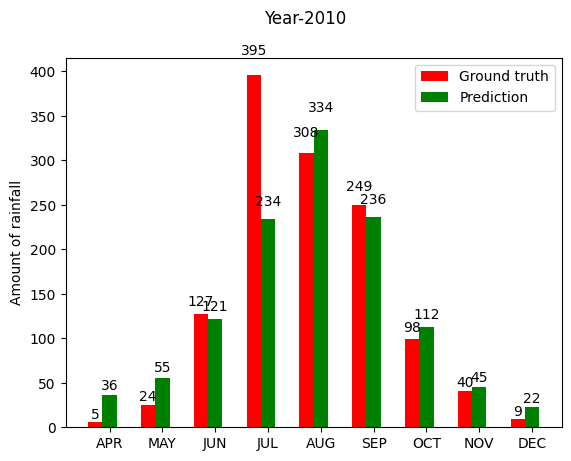

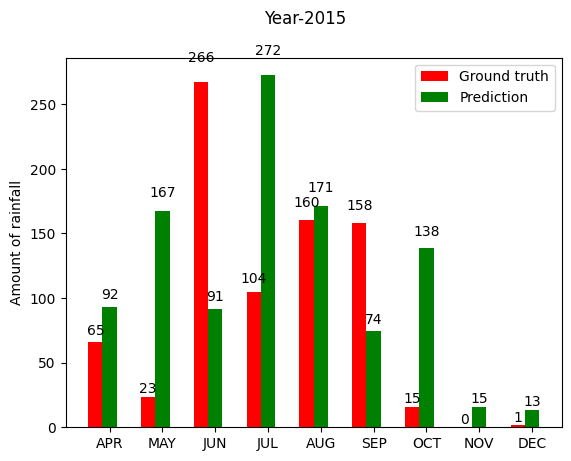

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)

#2015
y_year_pred_2015 = reg.predict(X_year_2015)
print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
from keras.models import Model
from keras.layers import Dense, Input, Conv1D, Flatten

# NN model
inputs = Input(shape=(3,1))
x = Conv1D(64, 2, padding='same', activation='elu')(inputs)
x = Conv1D(128, 2, padding='same', activation='elu')(x)
x = Flatten()(x)
x = Dense(128, activation='elu')(x)
x = Dense(64, activation='elu')(x)
x = Dense(32, activation='elu')(x)
x = Dense(1, activation='linear')(x)
model = Model(inputs=[inputs], outputs=[x])
model.compile(loss='mean_squared_error', optimizer='adamax', metrics=['mae'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3, 1)]            0         
                                                                 
 conv1d (Conv1D)             (None, 3, 64)             192       
                                                                 
 conv1d_1 (Conv1D)           (None, 3, 128)            16512     
                                                                 
 flatten (Flatten)           (None, 384)               0         
                                                                 
 dense (Dense)               (None, 128)               49280     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080  

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
469/469 [==============================] - 6s 7ms/step - loss: 19451.7168 - mae: 87.6137 - val_loss: 17908.0332 - val_mae: 88.3889
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 18376.0039 - mae: 86.1711 - val_loss: 17638.2773 - val_mae: 87.9605
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 18331.4902 - mae: 86.1572 - val_loss: 17606.5645 - val_mae: 86.3898
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 18373.4492 - mae: 86.1448 - val_loss: 17251.1953 - val_mae: 84.4043
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 18278.4004 - mae: 85.8757 - val_loss: 17216.2070 - val_mae: 83.5593
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 18258.4082 - mae: 85.8217 - val_loss: 17211.3125 - val_mae: 83.7565
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 18213.9609 - mae: 85.5517 - val_loss: 17252.1016 - val_mae: 82.9059
Epoch 

MEAN 2005
121.2111111111111 126.1751139168646
Standard deviation 2005
123.77066107608005 89.10264430450832
MEAN 2010
139.93333333333334 133.3583872963097
Standard deviation 2010
135.71320250194282 103.8932397130743
MEAN 2015
88.52222222222223 115.2771720644692
Standard deviation 2015
86.62446123324875 77.51849820774842


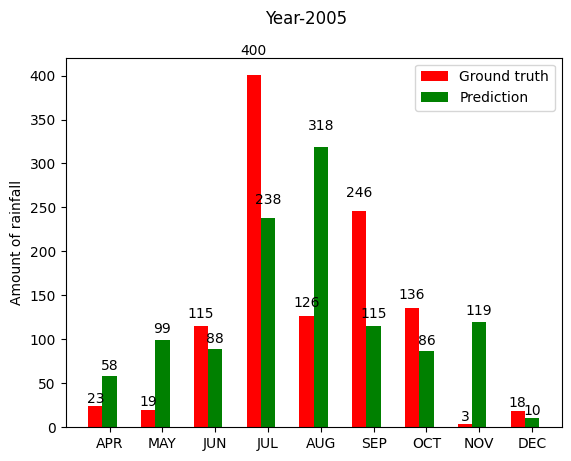

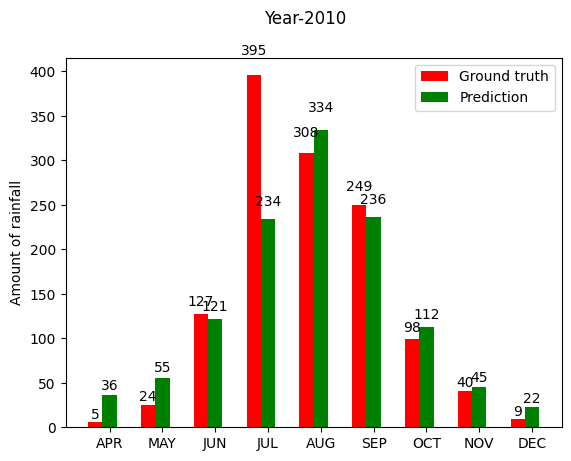

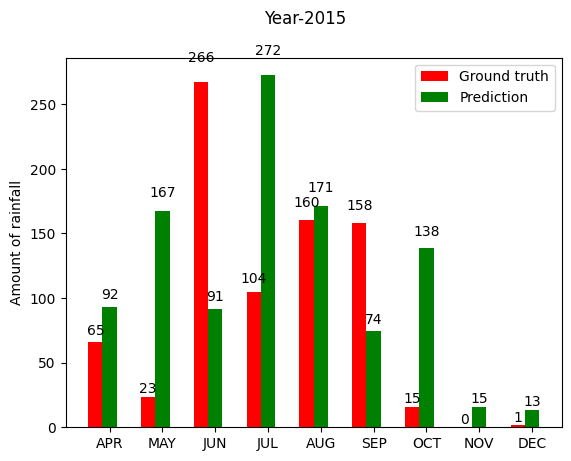

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)

#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
# spliting training and testing data only for telangana
telangana = np.asarray(df[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[df['SUBDIVISION'] == 'TELANGANA'])

X = None; y = None
for i in range(telangana.shape[1]-3):
    if X is None:
        X = telangana[:, i:i+3]
        y = telangana[:, i+3]
    else:
        X = np.concatenate((X, telangana[:, i:i+3]), axis=0)
        y = np.concatenate((y, telangana[:, i+3]), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

64.72601914484643


In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(kernel='rbf', gamma='auto', C=0.5, epsilon=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

115.32415990638656


In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
15/15 [==============================] - 0s 19ms/step - loss: 7730.7173 - mae: 66.5306 - val_loss: 4884.9380 - val_mae: 51.3776
Epoch 2/10
15/15 [==============================] - 0s 15ms/step - loss: 6398.9771 - mae: 57.0684 - val_loss: 4763.3906 - val_mae: 51.0491
Epoch 3/10
15/15 [==============================] - 0s 12ms/step - loss: 6146.8330 - mae: 57.4862 - val_loss: 4721.5610 - val_mae: 52.0764
Epoch 4/10
15/15 [==============================] - 0s 11ms/step - loss: 6076.9673 - mae: 57.8180 - val_loss: 4650.3145 - val_mae: 51.1106
Epoch 5/10
15/15 [==============================] - 0s 15ms/step - loss: 5982.8208 - mae: 56.9497 - val_loss: 4603.5850 - val_mae: 50.8770
Epoch 6/10
15/15 [==============================] - 0s 15ms/step - loss: 5917.8525 - mae: 56.4305 - val_loss: 4562.6929 - val_mae: 50.4906
Epoch 7/10
15/15 [==============================] - 0s 13ms/step - loss: 5866.3457 - mae: 56.1208 - val_loss: 4529.0146 - val_mae: 50.3335
Epoch 8/10
15/15 [=========

MEAN 2005
121.2111111111111 106.49798150231585
Standard deviation 2005
123.77066107608005 76.08558540019237
MEAN 2010
139.93333333333334 112.18662987131034
Standard deviation 2010
135.71320250194282 84.35813629737332
MEAN 2015
88.52222222222223 96.76817006572782
Standard deviation 2015
86.62446123324875 52.45304841713268


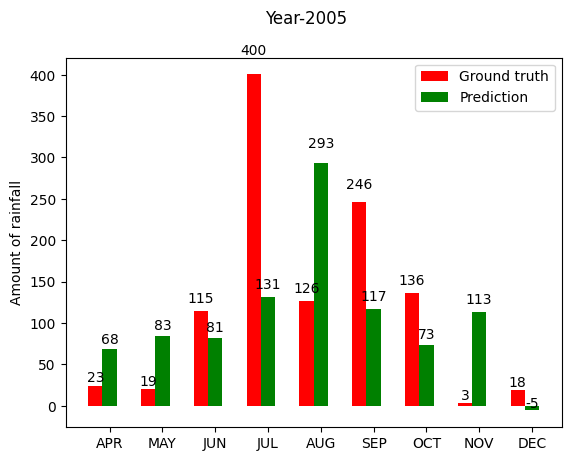

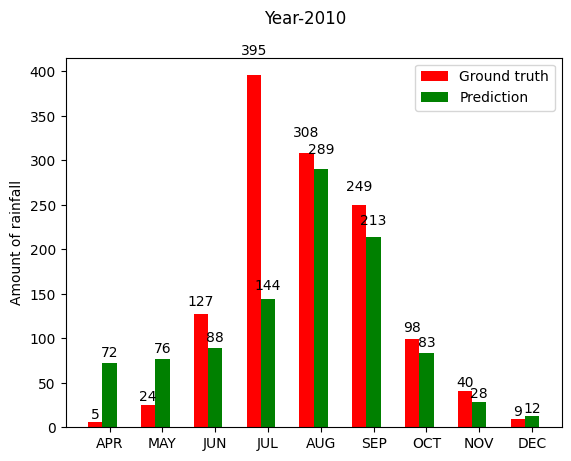

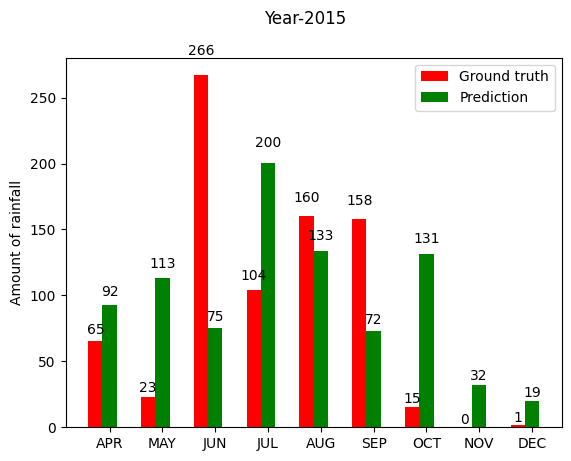

In [ ]:
#2005
y_year_pred_2005 = reg.predict(X_year_2005)

#2010
y_year_pred_2010 = reg.predict(X_year_2010)

#2015
y_year_pred_2015 = reg.predict(X_year_2015)

print ("MEAN 2005")
print (np.mean(y_year_2005),np.mean(y_year_pred_2005))
print ("Standard deviation 2005")
print (np.sqrt(np.var(y_year_2005)),np.sqrt(np.var(y_year_pred_2005)))


print ("MEAN 2010")
print (np.mean(y_year_2010),np.mean(y_year_pred_2010))
print ("Standard deviation 2010")
print (np.sqrt(np.var(y_year_2010)),np.sqrt(np.var(y_year_pred_2010)))


print ("MEAN 2015")
print (np.mean(y_year_2015),np.mean(y_year_pred_2015))
print ("Standard deviation 2015")
print (np.sqrt(np.var(y_year_2015)),np.sqrt(np.var(y_year_pred_2015)))

plot_graphs(y_year_2005,y_year_pred_2005,"Year-2005")
plot_graphs(y_year_2010,y_year_pred_2010,"Year-2010")
plot_graphs(y_year_2015,y_year_pred_2015,"Year-2015")

In [ ]:
df = pd.read_csv('/content/district_wise_rainfall_normal.csv')

In [ ]:
district.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


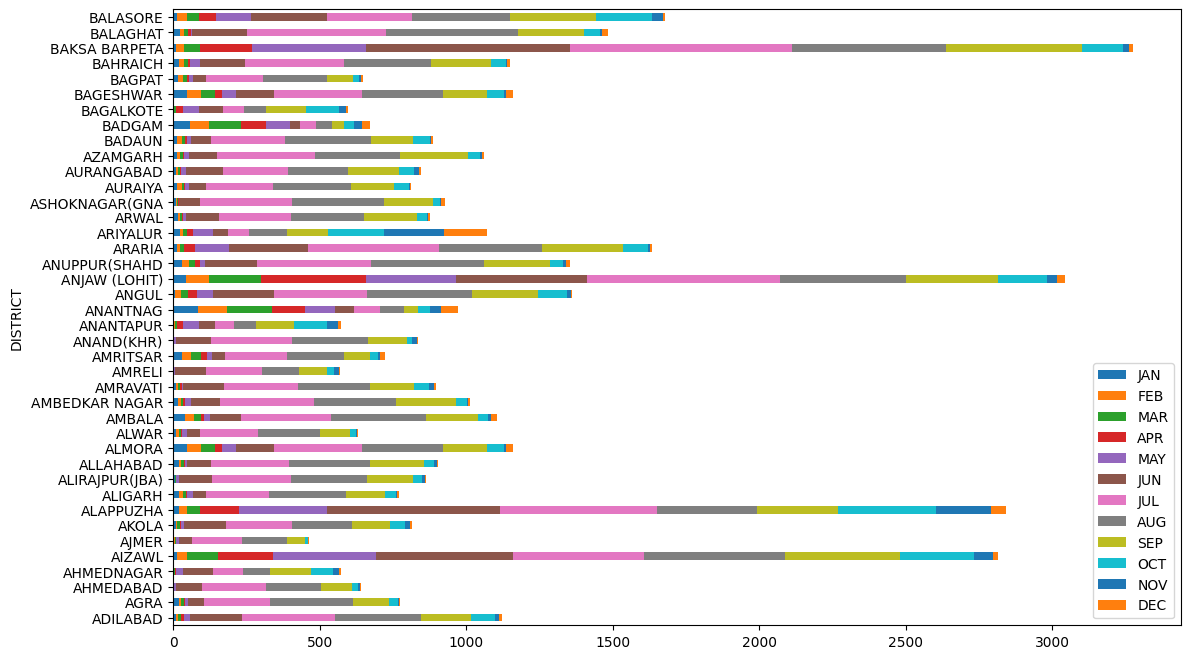

In [ ]:
district[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(13,8));

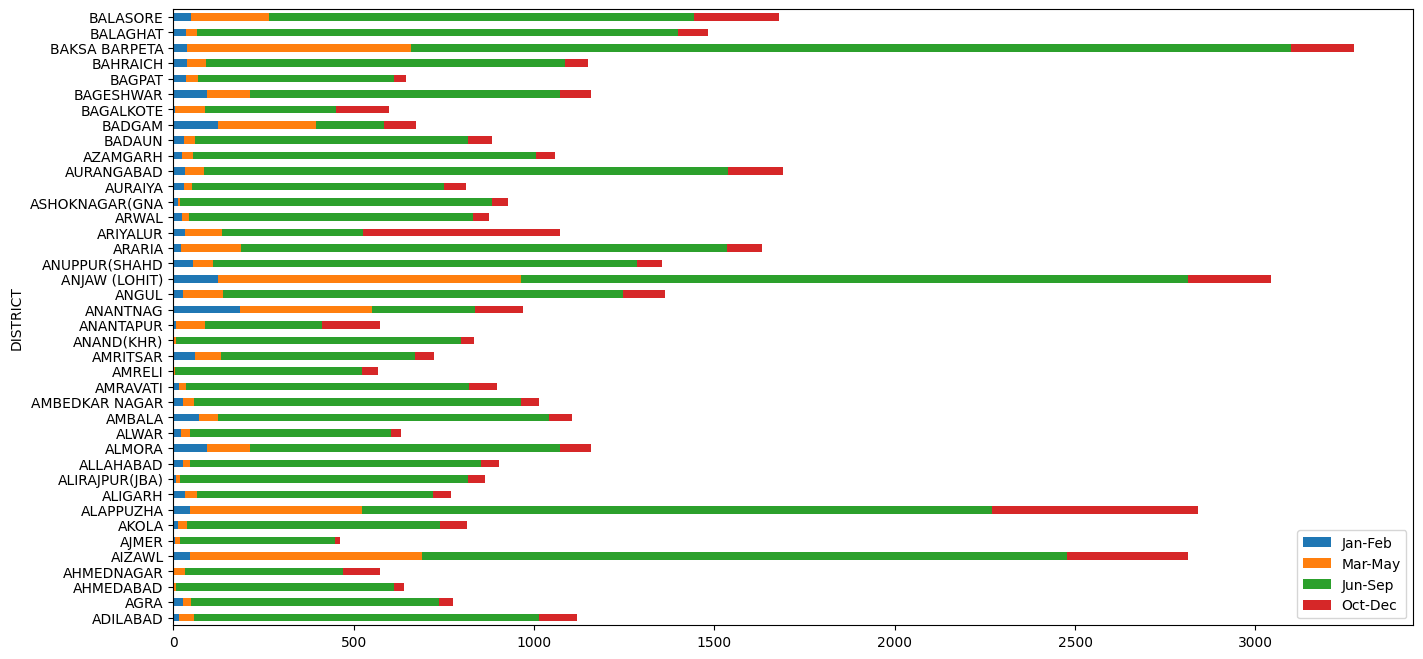

In [ ]:
district[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

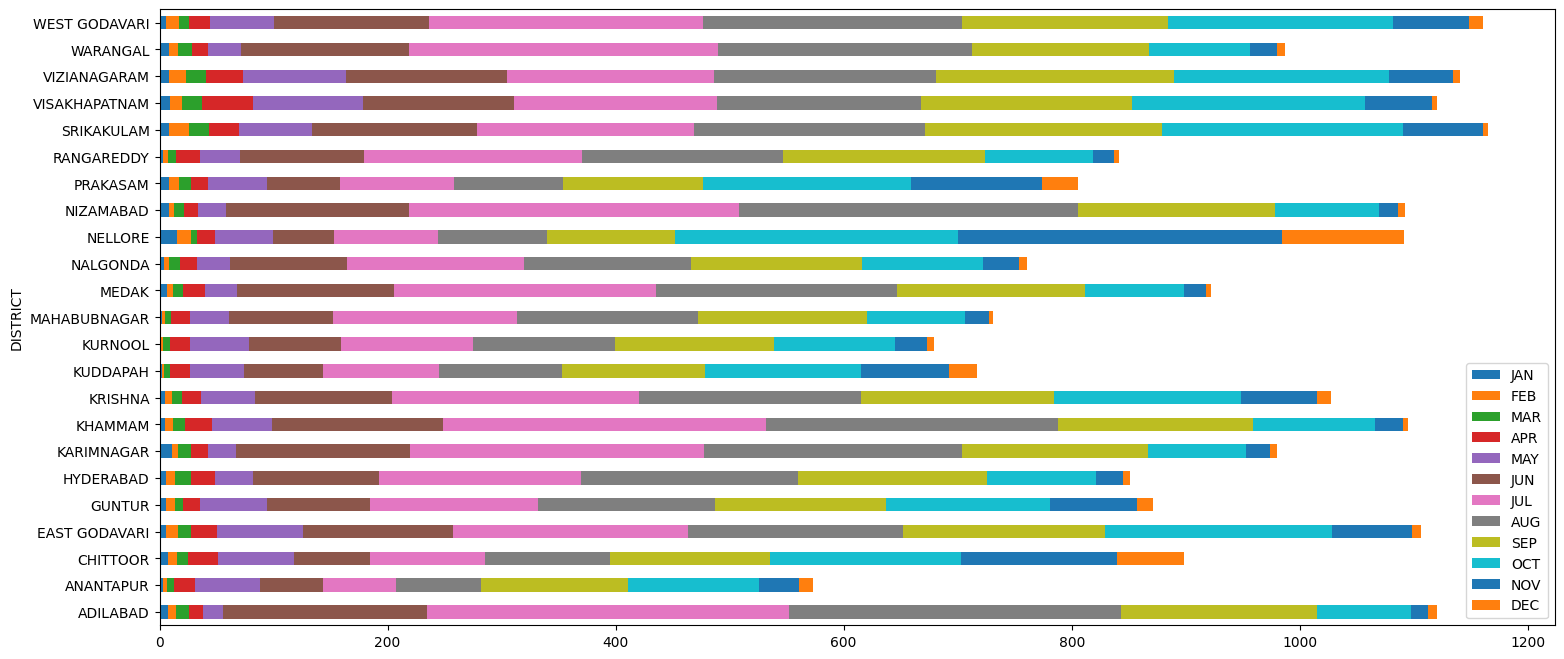

In [ ]:
ap_data = district[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']
ap_data[['DISTRICT', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("DISTRICT").mean()[:40].plot.barh(stacked=True,figsize=(18,8));

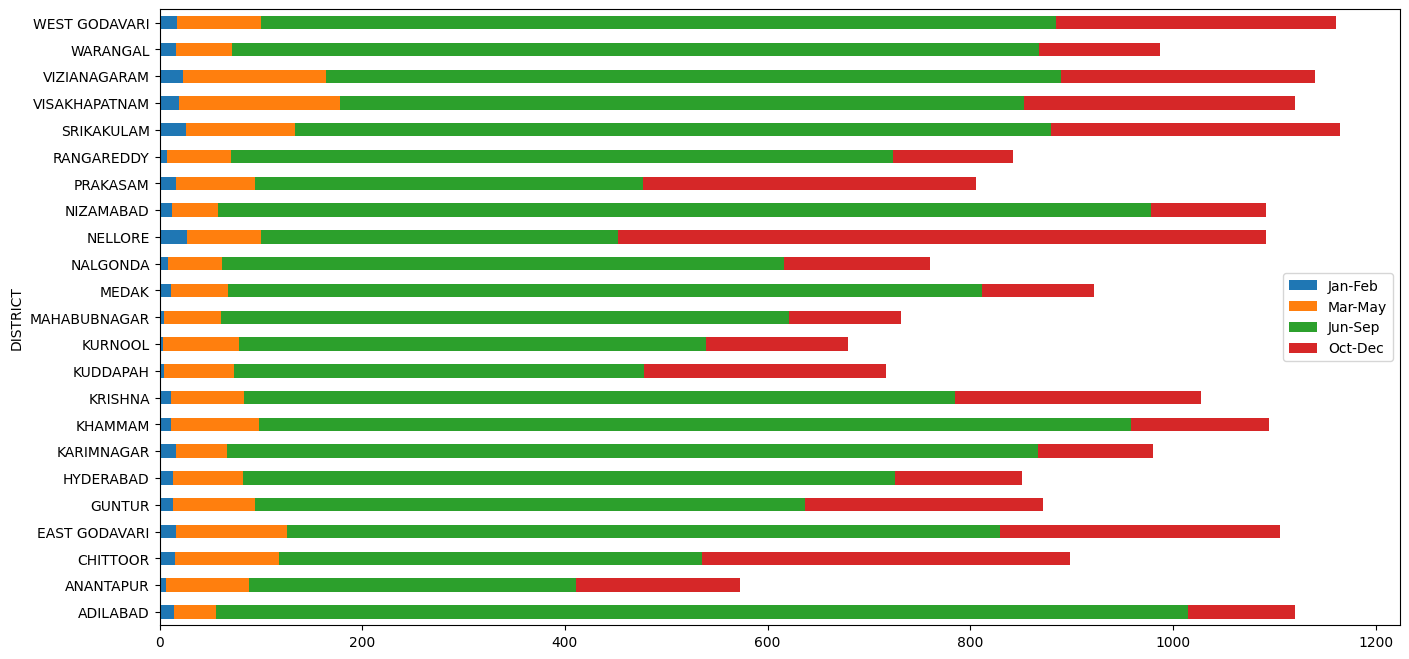

In [ ]:
ap_data[['DISTRICT', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("DISTRICT").sum()[:40].plot.barh(stacked=True,figsize=(16,8));

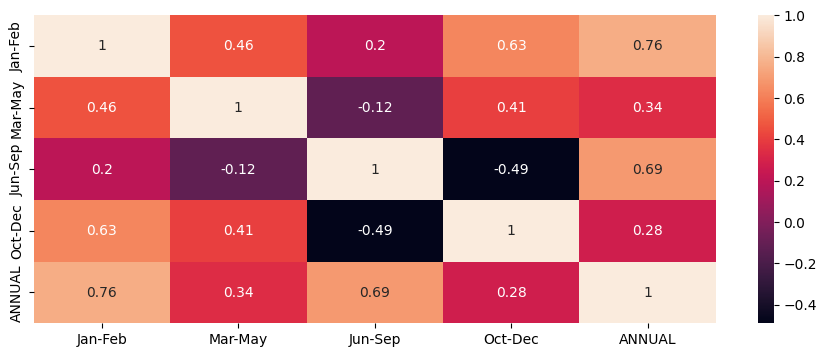

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec','ANNUAL']].corr(),annot=True)
plt.show()

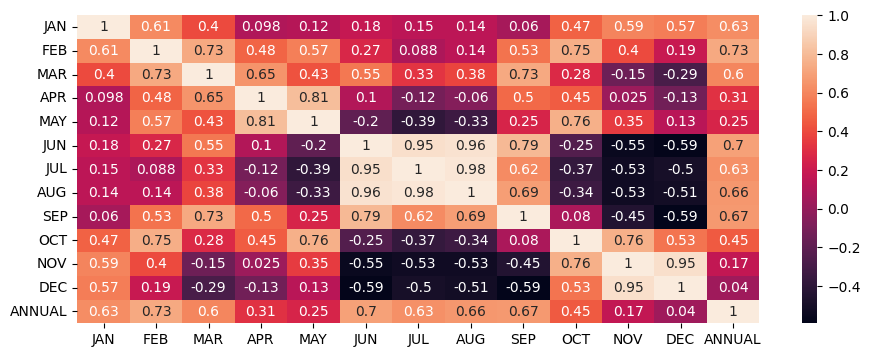

In [ ]:
plt.figure(figsize=(11,4))
sns.heatmap(ap_data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [ ]:
# testing and training for the complete data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(district[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
temp = district[['DISTRICT','JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[district['STATE_UT_NAME'] == 'ANDHRA PRADESH']
hyd = np.asarray(temp[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP', 'OCT', 'NOV', 'DEC']].loc[temp['DISTRICT'] == 'HYDERABAD'])
# print temp
X_year = None; y_year = None
for i in range(hyd.shape[1]-3):
    if X_year is None:
        X_year = hyd[:, i:i+3]
        y_year = hyd[:, i+3]
    else:
        X_year = np.concatenate((X_year, hyd[:, i:i+3]), axis=0)
        y_year = np.concatenate((y_year, hyd[:, i+3]), axis=0)

In [ ]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

57.08862331011229


MEAN Hyderabad
91.48888888888888 108.20250522332881
Standard deviation hyderabad
69.2514651982091 58.90326979488763


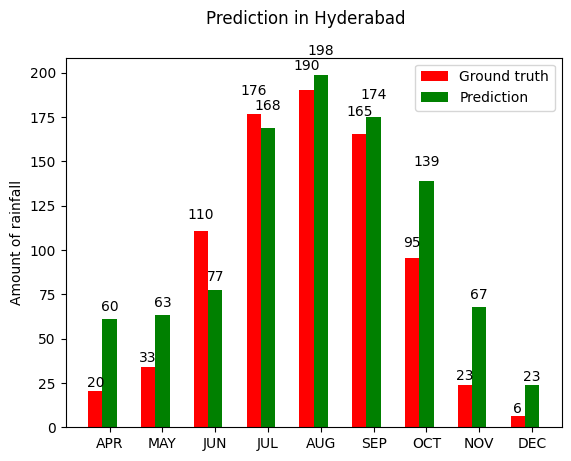

In [ ]:
y_year_pred = reg.predict(X_year)
print ("MEAN Hyderabad")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation hyderabad")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")

In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

116.60671510825178


MEAN Hyderabad
91.48888888888888 80.34903236716154
Standard deviation hyderabad
69.2514651982091 0.14736007434982146


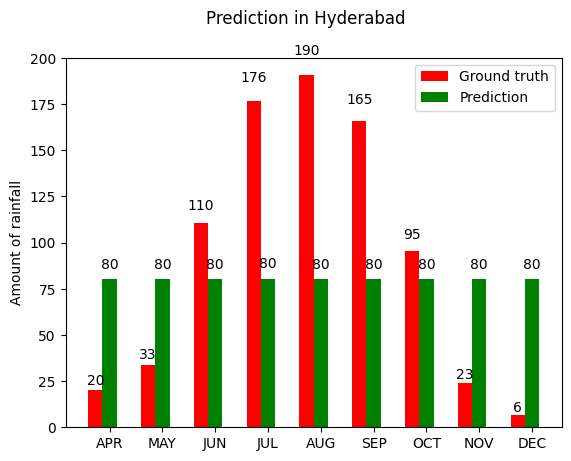

In [ ]:
y_year_pred = clf.predict(X_year)
print ("MEAN Hyderabad")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation hyderabad")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))

plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")

In [ ]:
model.fit(x=np.expand_dims(X_train, axis=2), y=y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.1, shuffle=True)
y_pred = model.predict(np.expand_dims(X_test, axis=2))
print (mean_absolute_error(y_test, y_pred))

Epoch 1/10
65/65 [==============================] - 1s 13ms/step - loss: 7246.8208 - mae: 52.6630 - val_loss: 4246.3433 - val_mae: 41.9406
Epoch 2/10
65/65 [==============================] - 0s 5ms/step - loss: 5563.7285 - mae: 45.4017 - val_loss: 3771.1577 - val_mae: 39.2462
Epoch 3/10
65/65 [==============================] - 0s 7ms/step - loss: 5285.3696 - mae: 43.5332 - val_loss: 4021.2119 - val_mae: 40.0302
Epoch 4/10
65/65 [==============================] - 1s 11ms/step - loss: 5158.8345 - mae: 43.1318 - val_loss: 3873.8169 - val_mae: 37.8901
Epoch 5/10
65/65 [==============================] - 0s 7ms/step - loss: 5103.6782 - mae: 42.0583 - val_loss: 3529.1169 - val_mae: 37.4411
Epoch 6/10
65/65 [==============================] - 0s 6ms/step - loss: 5028.7109 - mae: 42.1879 - val_loss: 3499.5203 - val_mae: 37.0721
Epoch 7/10
65/65 [==============================] - 0s 7ms/step - loss: 5020.8711 - mae: 41.6839 - val_loss: 3531.6069 - val_mae: 36.9970
Epoch 8/10
65/65 [==============

In [ ]:
# training and testing sets for only andhra pradesh data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(ap_data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print (mean_absolute_error(y_test, y_pred))

31.249748674622488


MEAN Hyderabad
91.48888888888888 96.54891993068443
Standard deviation hyderabad
69.2514651982091 60.81935519544688


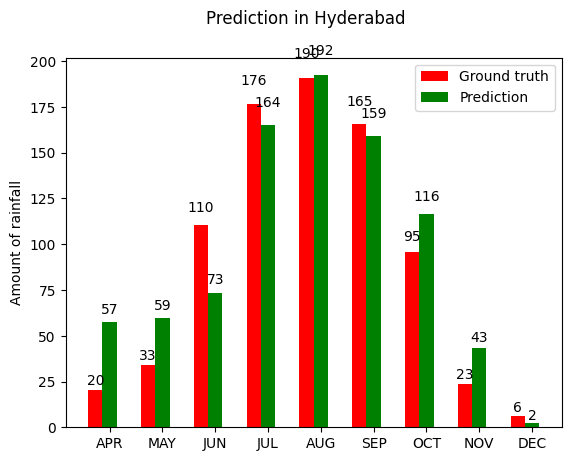

In [ ]:
y_year_pred = reg.predict(X_year)
print ("MEAN Hyderabad")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation hyderabad")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")

59.35057496896855
MEAN Hyderabad
91.48888888888888 95.89978206795146
Standard deviation hyderabad
69.2514651982091 0.09247315036320868


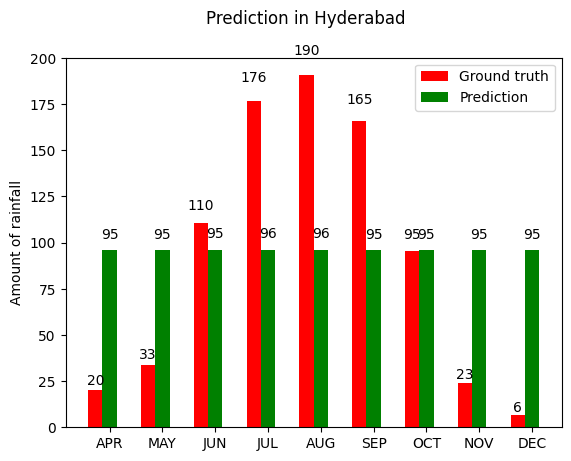

In [ ]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print (mean_absolute_error(y_test, y_pred))


y_year_pred = clf.predict(X_year)
print ("MEAN Hyderabad")
print (np.mean(y_year),np.mean(y_year_pred))
print ("Standard deviation hyderabad")
print (np.sqrt(np.var(y_year)),np.sqrt(np.var(y_year_pred)))
plot_graphs(y_year,y_year_pred,"Prediction in Hyderabad")